<a id=top-page></a>
# Generate images for Fig. 2

***

In [1]:
import numpy as np
import pandas as pd
import cmcrameri.cm as cmc
import matplotlib.pyplot as plt
from pykitPIV import Particle, FlowField, Motion, Image, Postprocess

In [2]:
n_images = 2

In [3]:
image_size = (100,100)

In [4]:
size_buffer = 10

In [5]:
figsize = (6,3.5)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [6]:
image = Image(random_seed=100)

In [7]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

In [8]:
flowfield.generate_random_velocity_field(gaussian_filters=(2,5),
                                         n_gaussian_filter_iter=10,
                                         displacement=(0,10))

In [9]:
image.add_flowfield(flowfield)

Velocity field added to the image.


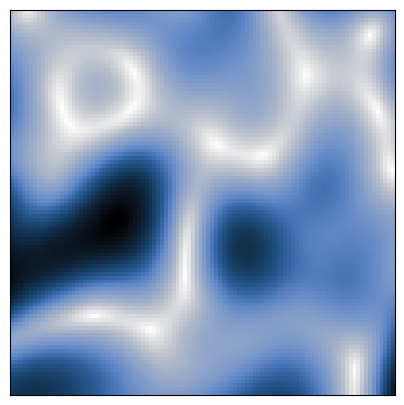

In [10]:
image.plot_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    # filename='FlowField.svg');
                                    filename='random-smooth.png');

In [11]:
flowfield.generate_spherical_harmonics_velocity_field(displacement=(0,10), order=10, degree=10)

In [12]:
image.add_flowfield(flowfield)

Velocity field added to the image.


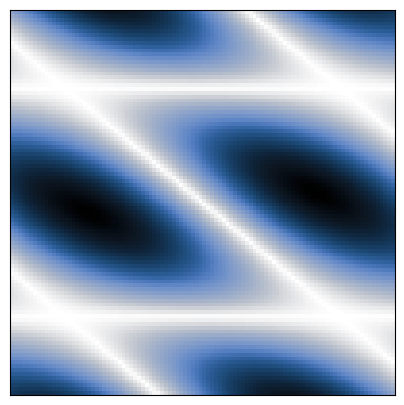

In [13]:
image.plot_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    filename='spherical-harmonics.png');

In [14]:
flowfield.generate_checkered_velocity_field(displacement=(0,10), m=6, n=6)

In [15]:
image.add_flowfield(flowfield)

Velocity field added to the image.


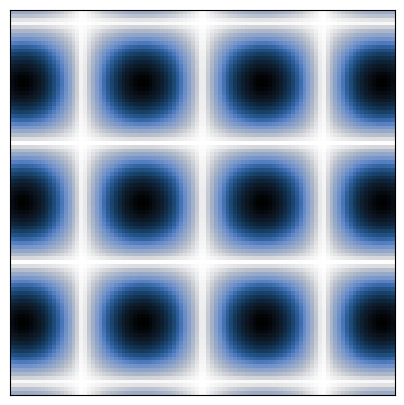

In [16]:
image.plot_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    # filename='FlowField.svg');
                                    filename='checkered.png');

In [17]:
flowfield.generate_chebyshev_velocity_field(displacement=(0,10), order=30)

In [18]:
image.add_flowfield(flowfield)

Velocity field added to the image.


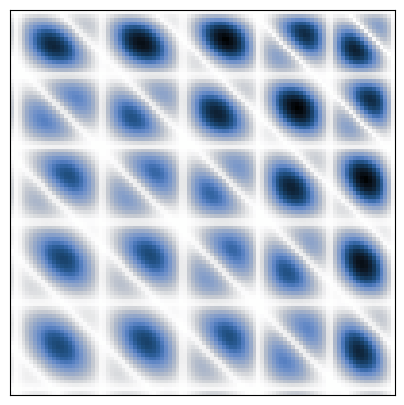

In [19]:
image.plot_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    filename='chebyshev.png');

In [20]:
flowfield.generate_sinusoidal_velocity_field(amplitudes=(2,2), 
                                             wavelengths=(30,30),
                                            components='u')

In [21]:
image.add_flowfield(flowfield)

Velocity field added to the image.


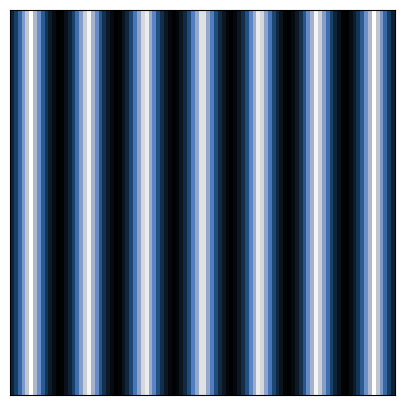

In [22]:
image.plot_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    filename='sinusoidal.png');

In [42]:
grid_size = 128
n_modes = 100

In [43]:
flowfield = FlowField(n_images,
                      size=(grid_size,grid_size),
                      size_buffer=0)

In [44]:
u_df = pd.read_csv('../../docs/data/u_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
v_df = pd.read_csv('../../docs/data/v_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
w_df = pd.read_csv('../../docs/data/w_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()

u_tensor = np.reshape(u_df, (grid_size,grid_size,grid_size))
v_tensor = np.reshape(v_df, (grid_size,grid_size,grid_size))
w_tensor = np.reshape(w_df, (grid_size,grid_size,grid_size))

In [45]:
synth_turb_gen_velocity_field = (u_tensor[0:2,None,:,:], v_tensor[0:2,None,:,:])

In [46]:
u_tensor.shape

(128, 128, 128)

In [47]:
synth_turb_gen_velocity_field = image.concatenate_tensors(synth_turb_gen_velocity_field)

In [48]:
synth_turb_gen_velocity_field.shape

(2, 2, 128, 128)

In [49]:
flowfield.upload_velocity_field(synth_turb_gen_velocity_field)

In [50]:
image.add_flowfield(flowfield)

Velocity field added to the image.


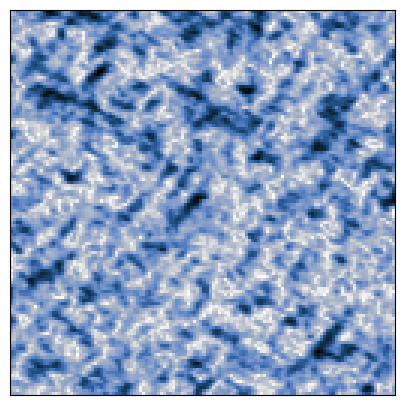

In [51]:
image.plot_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    filename='synthetic-turbulence.png');

***